# Mid-Project

## Execise 1: Market-Based Valuation

- An at a prespecified price (strike) at a predetermined date (European option) or over a determined
    period of time (American option). Some options are settled in actual stocks; most options, like
    those on an index, are settled in cash. People or institutions selling options are called option
    writers. Those buying options are called option holders.

- For a European call option on an index with strike 8,000 and index level of 8,200
    at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
    USD) from the option writer. If the index level is below the strike, say at 7,800, the option
    expires worthless and the writer does not have to pay anything. We can formalize this via
    the so-called inner value (or intrinsic value or payoff)—from the holder's viewpoint—of
    the option:
    
    $ h_T(S, K) = max[S_T − K, 0]$ 
    
    - where T is the maturity date of the option, $S_T$ the index level at this date and $K$ represents the
        strike price.
       
1. Compute the Inner value of a European call option on a stock index with strike of 8,000 dependent on the index level at maturity and plot this inner value function.

- Desired output:   
![call_inner_values](../data/02_mbv/call_inner_values.png)

2. What are the three scenarios that have to be distinguished with regard to the so-called moneyness of an option ? 
> As moneyness looks at the value of an option (we will consider in this case a call option) as if it were to be exercised right away. 
>    - in-the-money (ITM): in this case the strike price of the call option is lower than the current market value, which will generate profit for the option holder
>    - at-the-money (ATM): the strike and the market values are both equal, therefore the holder won't generate any profit, neither will he be at loss
>    - out-of-the-money (OTM): the strike price of the call is lower than the market value, thus the holder will buy at a higher value if he exercise the option. This latter becomes useless

3. What influences the present value of such a call option today? ([factors](https://www.investopedia.com/trading/factors-determine-option-pricing/))
>Price of the underlying security, time variable and time decay phenomenon which benefits mostly the option seller, and volatility.

4. Compute and plot the Black-Scholes-Merton formula.

- Input:

These heuristic insights are formalized in the seminal work of Black-Scholes-Merton (cf. Black and Scholes (1973) and Merton (1973)) who for the first time derived a closed option pricing formula for a parsimonious set of input parameters. Their formula says mainly the following:

$C_0^∗ = C^{BSM}(S_0 , K, T, r, \sigma)$ ([BSM_option_valuation](https://www.investopedia.com/terms/b/blackscholes.asp))

In words, the fair present value of a European call option $C_0^∗$ is given by their formula $C^{BSM}(\cdot)$ which takes as input parameters:
    
- $S_0$ the current index level
- $K$ the strike price of the option
- $T$ the maturity date (equals time-to-maturity viewed from the present date)
- $r$ the constant risk-less short rate
- $\sigma$ the volatility of the index, i.e. the standard deviation of the index level returns


- Desired output:   
 ![BSM_call_value](../data/02_mbv/call_values.png)


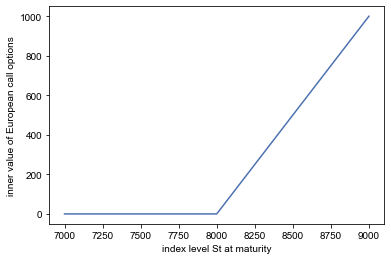

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#Variables 
K = 8000 #the strike price of the call option
S_t= np.array(range(7000,9250,250))
#Defining the intrinsic value function
def payoff(strike, idx_price):
    inner_value=[]
    for i in idx_price: 
        X=i-strike
        if X > 0:
            inner_value.append(X)
        else : 
            inner_value.append(0)    
    fig= plt.plot(idx_price,inner_value, color='b')
    plt.xlabel('index level St at maturity')
    plt.ylabel('inner value of European call options')
    plt.grid(True, color='white')
    plt.rcParams.update({'axes.facecolor':'grey'})
    sns.set_theme()
    return fig
inner_val=payoff(K,S_t)

In [3]:
class Call_option_payoff:
    def payoff(self,strike,idx_price):
        inner_value=[]
        for i in idx_price: 
            X=i-strike
            if X > 0:
                inner_value.append(X)
            else : 
                inner_value.append(0)  
        figure = plt.plot(idx_price,inner_value, color='b')
        plt.xlabel('index level St at maturity')
        plt.ylabel('inner value of European call options')
        plt.grid(True, color='white')
        plt.rcParams.update({'axes.facecolor':'grey'})
        sns.set_theme()
        return figure
    def _init_(self, strike, idx_price):
        self.strike=strike
        self.idx_price=idx_price
        self.payoff=inner_value

In [2]:
call=Call_option_payoff(8000,range(4000,13000,1000))

NameError: name 'Call_option_payoff' is not defined

In [40]:
from scipy.stats import norm 
import datetime
def volatility(S):
    log_returns=[]
    for i in range(0,len(S)): 
        log_returns.append(np.log(S[i]/S[i-1]))
    SD=np.std(log_returns)
    return SD
def BSM_call(S,K,SD,rf,Year, Month, Day, payoff):
    currentDate = datetime.date.today()
    maturity= datetime.date(Year, Month, Day)
    T=(maturity-currentDate).days
    call_price=[]
    for i in S: 
        d1=np.array(np.log(i/K)+(rf+(SD**2)/2)*T)/(np.sqrt(T)*SD)
        d2=np.array(d1-np.sqrt(T)*SD)  
        c=np.array(i*norm.cdf(d1)-(K*norm.cdf(d2)*np.exp(-rf*T)))
        call_price.append(c)
    payoff(K, S)
    plt.plot(S, call_price,color='red')
    plt.xlabel('index level S0')
    plt.ylabel('present value C(t=0)')
    plt.yticks([0,1000,2000,3000,4000])
    plt.grid(True, color='white')
    plt.rcParams.update({'axes.facecolor':'grey'})
    sns.set_theme()
    return call_price

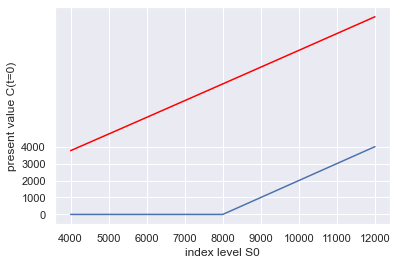

In [41]:
Strike= np.array(range(4000,13000,1000))
SD=volatility(Strike)
risk_free=0.05
call=BSM_call(Strike,8000, SD,risk_free, 2022,3,11, payoff)

## Exercise 2: MonteCarlo Simulation

- Implement all models included on the pdf file [MonteCarlo](../data/MonteCarlo.pdf)

In [42]:
present_value=[]
for i, j in zip(Strike,call): 
    X=i-j
    if X > 0:
        present_value.append(X)
    else : 
        present_value.append(0) 

In [43]:
present_value

[237.100792823323,
 256.0233826301692,
 271.8167311723719,
 285.3578813477243,
 297.1974793822483,
 307.7049745777513,
 317.14075362222866,
 325.69545817800827,
 333.51297104549485]